In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.offsetbox import AnchoredText
import cartopy.io.shapereader as shpr

%matplotlib inline

# What area am I interested in

In [2]:
cities=shpr.Reader(shpr.natural_earth(resolution='110m', category='cultural', name='populated_places'))

citNames=list()
citLat=list()
citLon=list()
for i in cities.records():
    citNames.append(i.attributes['NAME'])
    citLat.append(i.attributes['LATITUDE'])
    citLon.append(i.attributes['LONGITUDE'])

In [3]:
import os
os.environ["CARTOPY_USER_BACKGROUNDS"] = "/Users/ajs/compound/ref/"

/Users/ajs/opt/anaconda3/lib/python3.8/site-packages/PIL/Image.py:2855: DecompressionBombWarning: Image size (131220000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


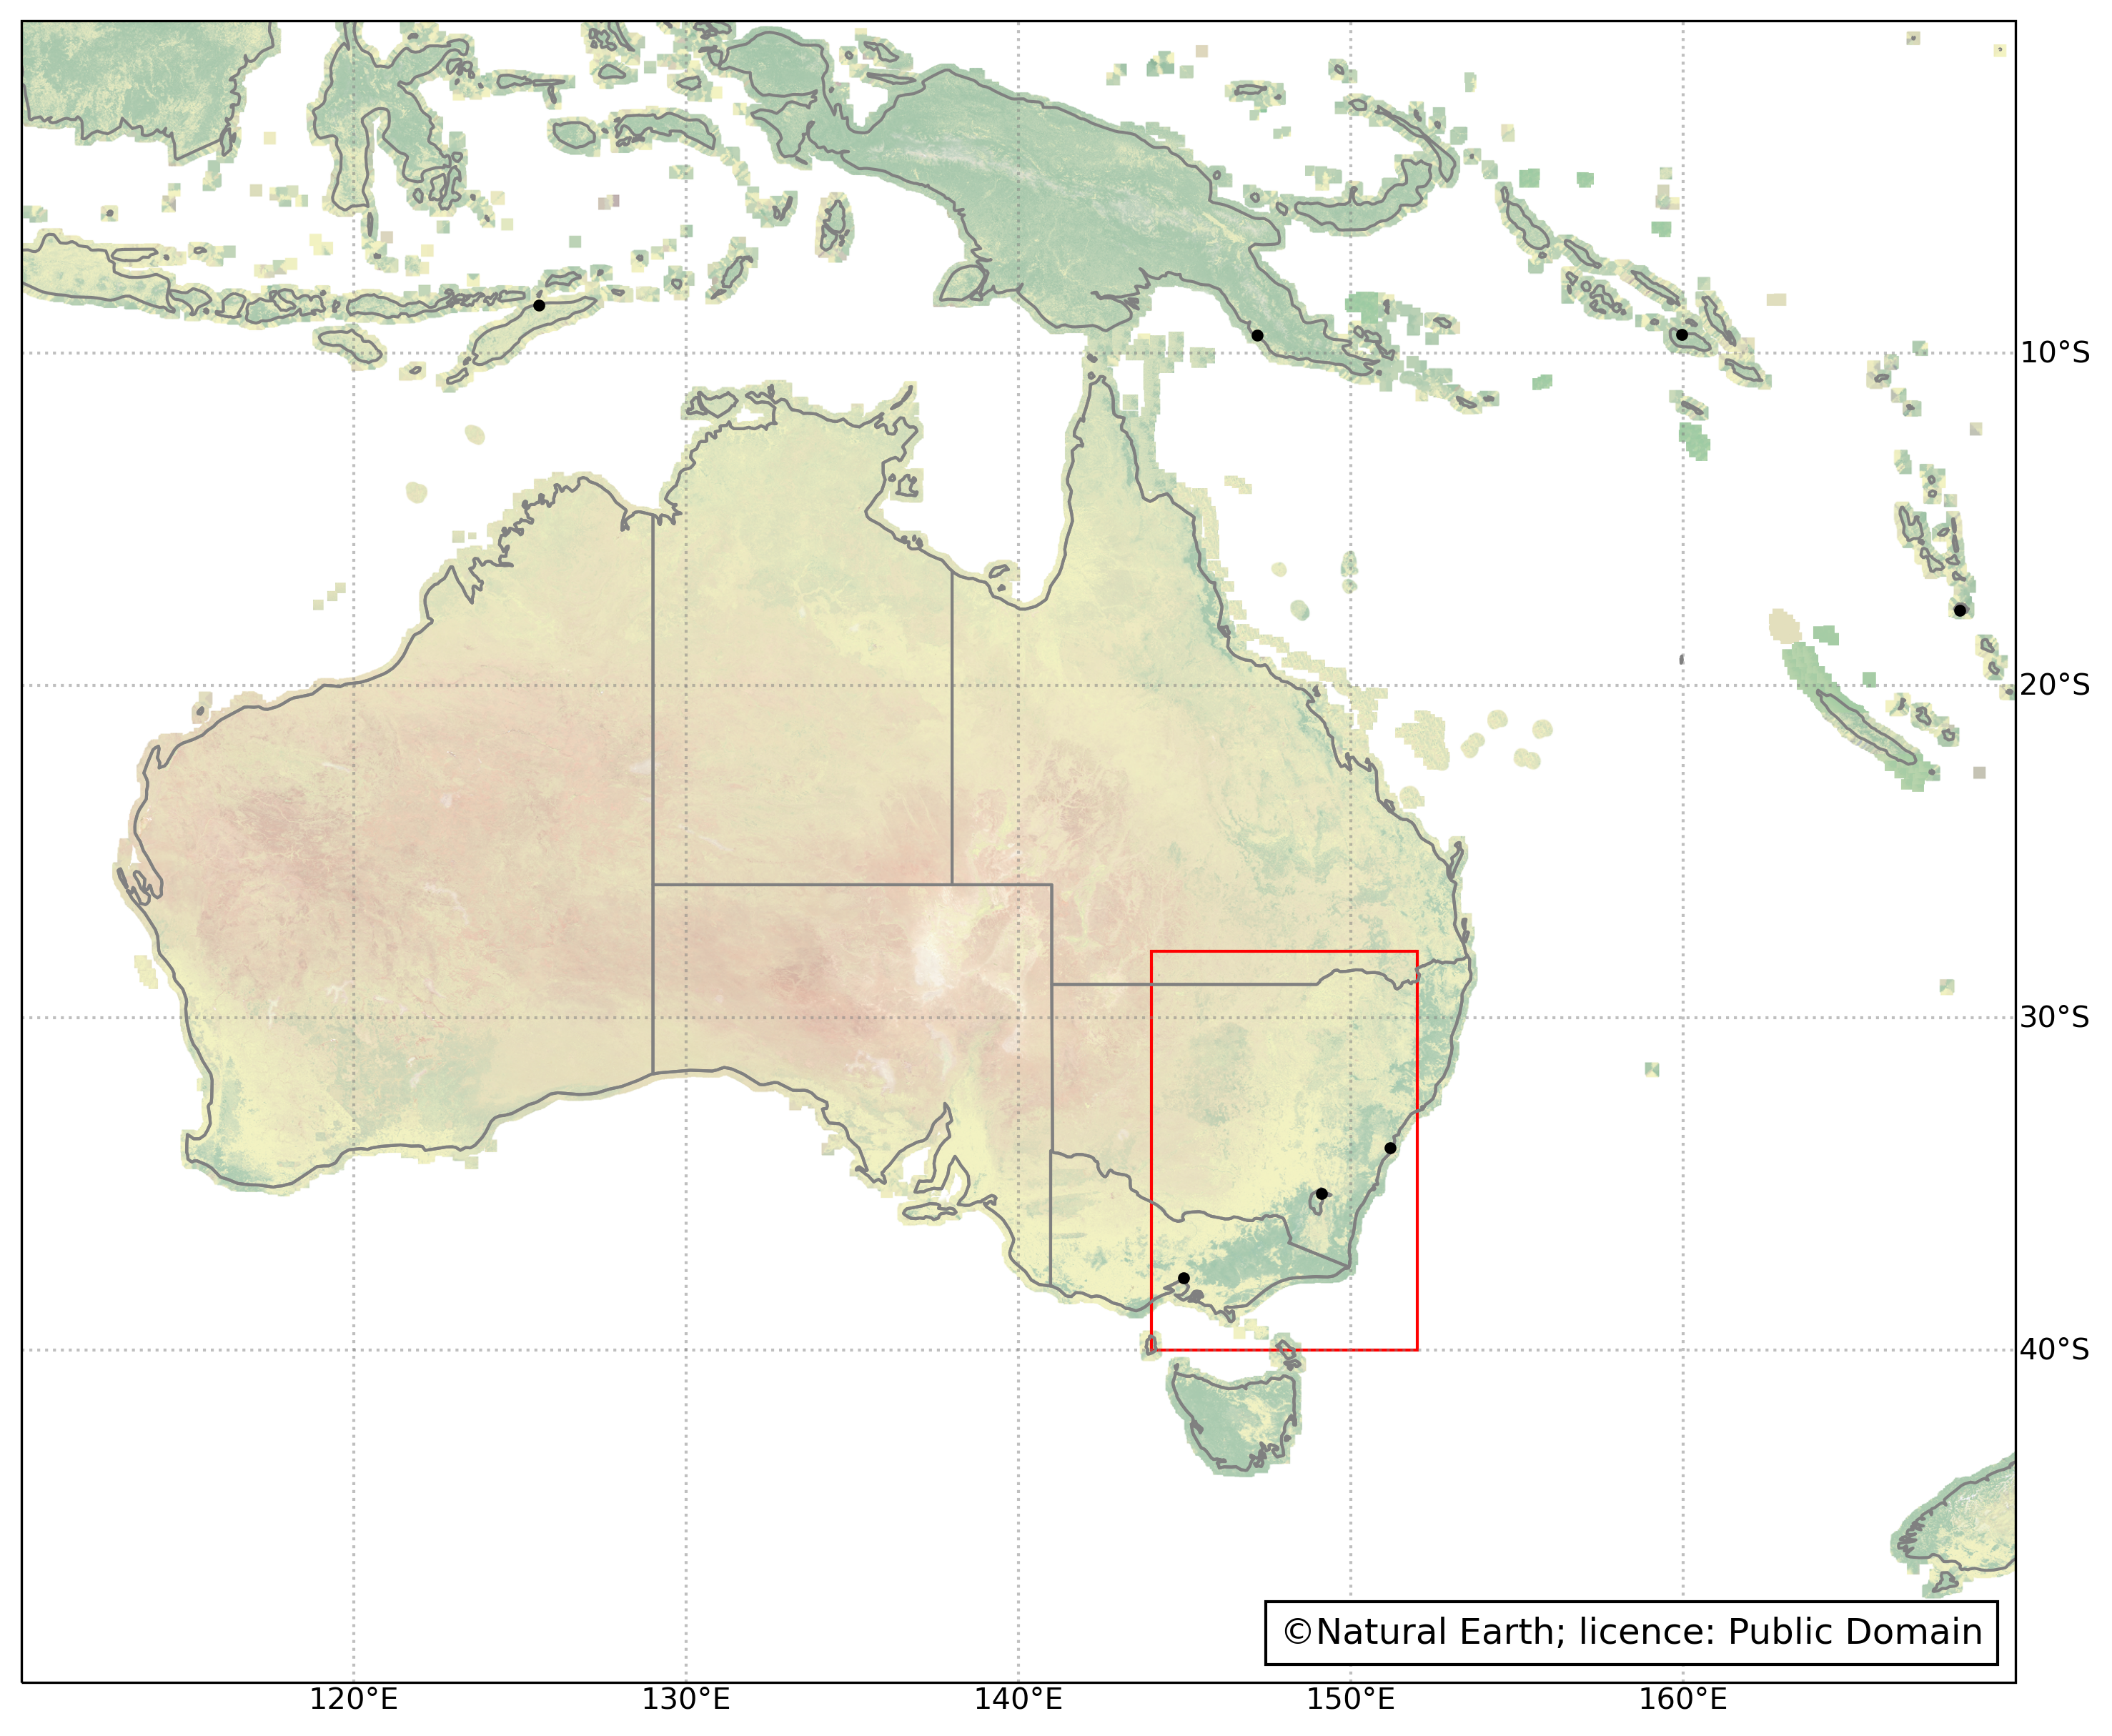

In [4]:
fig=plt.figure(figsize=(12,12), dpi=300)

ax=fig.add_subplot(projection=ccrs.PlateCarree())

ax.background_img(name="NE1", resolution="low")

ax.set_xlim(110,170)
ax.set_ylim(-50,0)

gl=ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle=':')
gl.top_labels=False
gl.left_labels=False


#credit: https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
ax.add_feature(cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces',
        scale='50m',
        facecolor='none'), edgecolor='grey')

ax.add_feature(cfeature.OCEAN) 

ax.coastlines(color='grey')

ax.plot(citLon, citLat, '.', color='black', label=citNames, transform=ccrs.PlateCarree())

ax.add_patch(mpatches.Rectangle(xy=[144, -40], width=8, height=12,
                                edgecolor='red',facecolor='none' ))



# Add a text annotation for the license information to the
    # the bottom right corner.
text = AnchoredText(u"\u00A9" + "Natural Earth; licence: Public Domain",
                        loc=4, prop={'size': 12}, frameon=True)
ax.add_artist(text)

plt.show()

# Areas for index calcs

In [5]:
import sys
sys.path.append('../')

import utils._indexDefinitions as _index

In [6]:
sst=_index.sstIndex

In [1]:
sst

NameError: name 'sst' is not defined

In [8]:
keyLs = list(sst.keys())

In [9]:
keyLs.remove('backgroundSst')

In [10]:
keyLs

['nino3', 'nino34', 'nino4', 'westIO', 'eastIO']

In [11]:
mapCentre=150
box=dict()
for index in keyLs:
    iSst = sst[index]
    box[index]={
        'xy':[iSst['longMin']-mapCentre, iSst['latMin']],
        'width':iSst['longMax']-iSst['longMin'],
        'height':iSst['latMax']-iSst['latMin']
    }

In [12]:
box

{'nino3': {'xy': [60, -5], 'width': 60, 'height': 10},
 'nino34': {'xy': [40, -5], 'width': 50, 'height': 10},
 'nino4': {'xy': [10, -5], 'width': 50, 'height': 10},
 'westIO': {'xy': [-100, -10], 'width': 20, 'height': 20},
 'eastIO': {'xy': [-60, -10], 'width': 20, 'height': 10}}

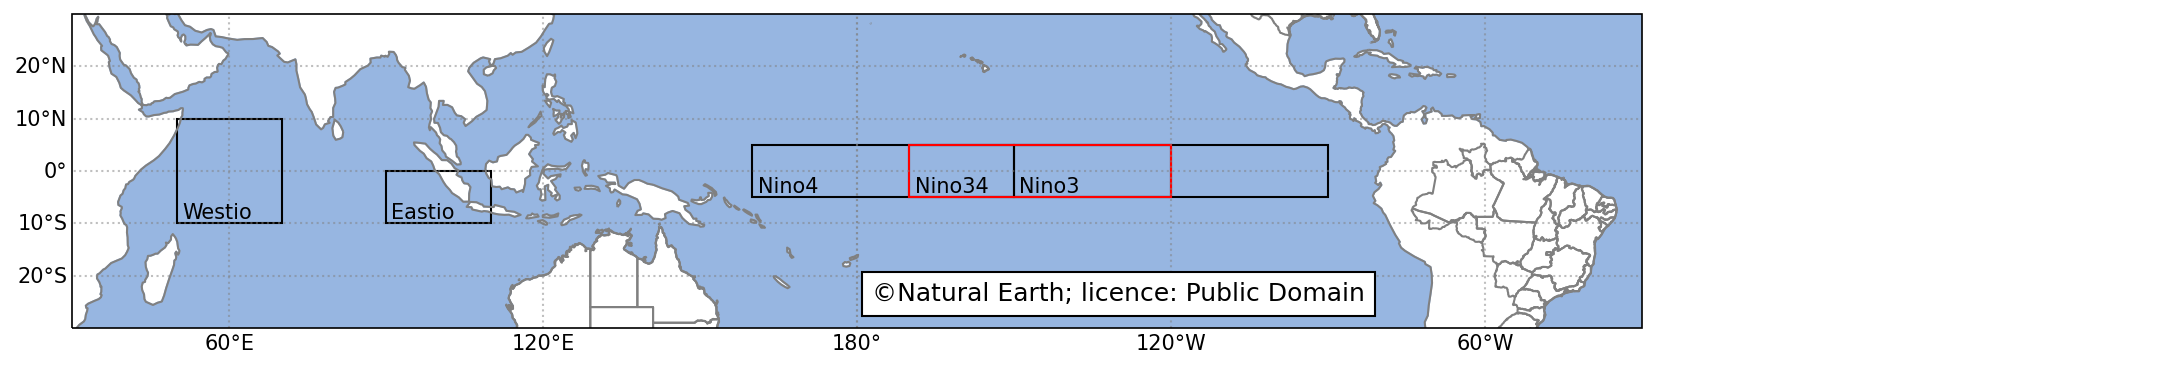

In [38]:
fig=plt.figure(figsize=(18,5), dpi=150)

ax=fig.add_subplot(projection=ccrs.PlateCarree(central_longitude=150))

#ax.background_img(name="NE1", resolution="low")

ax.set_xlim(-120,280)
ax.set_ylim(-30,30)

gl=ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle=':')
gl.top_labels=False
gl.left_labels=True


#credit: https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
ax.add_feature(cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces',
        scale='50m',
        facecolor='none'), edgecolor='grey')

ax.add_feature(cfeature.OCEAN) 

ax.coastlines(color='grey')

for iKey in box.keys():
    i=box[iKey]
    ax.add_patch(mpatches.Rectangle(
        xy=i['xy'], width=i['width'], height=i['height'],
                                edgecolor='black',facecolor='none' ))
    plt.text(i['xy'][0]+1,i['xy'][1]+1,iKey.capitalize())
    
i=box['nino34']
ax.add_patch(mpatches.Rectangle(
        xy=i['xy'], width=i['width'], height=i['height'],
                                edgecolor='red',facecolor='none' ))


# Add a text annotation for the license information to the
    # the bottom right corner.
text = AnchoredText(u"\u00A9" + "Natural Earth; licence: Public Domain",
                        loc='lower center', prop={'size': 12}, frameon=True)
ax.add_artist(text)

plt.show()

In [14]:
mpatches.Rectangle

matplotlib.patches.Rectangle

In [15]:
ccrs.PlateCarree()